In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [47]:
train_data = pd.read_csv("train_data.csv",names=["sentiments", "reviews"])

In [48]:
def basic_cleaning(data_frame):
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.lower())
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

    
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_data(data_frame):
    data_frame['words'] = data_frame.reviews.apply(lambda review: nltk.word_tokenize(review))

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [49]:
# nltk.download('all')
#tag part of speech to get more accurate word during lemmatizaton
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

#extraction of lemma words after pos taggin 
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [50]:
basic_cleaning(train_data)
tokenize_data(train_data)
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [51]:
train_data

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...
...,...,...,...,...,...,...
17995,-1,i was referred to go to this place by a buddy ...,"[i, was, referred, to, go, to, this, place, by...","[referred, go, place, buddy, aftea, conversati...","[refer, go, place, buddy, aftea, conversation,...",refer go place buddy aftea conversation get sh...
17996,1,the food here was really good we started off ...,"[the, food, here, was, really, good, we, start...","[food, really, good, started, garlic, bread, c...","[food, really, good, start, garlic, bread, cov...",food really good start garlic bread cover toma...
17997,1,i eat at this place maybe a week i am die har...,"[i, eat, at, this, place, maybe, a, week, i, a...","[eat, place, maybe, week, die, hard, wing, fan...","[eat, place, maybe, week, die, hard, wing, fan...",eat place maybe week die hard wing fan best ev...
17998,1,phoenix airport is getting betteday by day i ...,"[phoenix, airport, is, getting, betteday, by, ...","[phoenix, airport, getting, betteday, day, pri...","[phoenix, airport, get, betteday, day, primari...",phoenix airport get betteday day primarily use...


In [138]:
from sklearn.model_selection import train_test_split
train_review, test_review, train_sentiment, test_sentiment =train_test_split(train_data.cleaned_review,train_data.sentiments,shuffle=True,random_state=0,stratify=train_data.sentiments,train_size=.85)

In [381]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(min_df=.0080,use_idf=False,ngram_range=(1,2))
feature_matrix = tf_vectorizer.fit_transform(train_review)
feature_array = feature_matrix.toarray()

In [382]:
vocab_list = tf_vectorizer.get_feature_names_out()
vocab_list

array(['able', 'absolutely', 'accommodate', ..., 'youve', 'yummy', 'zero'],
      dtype=object)

### Select K-best features

In [383]:
from sklearn.feature_selection import SelectKBest, chi2

vocab_list = tf_vectorizer.get_feature_names_out()

select_k_best = SelectKBest(score_func=chi2, k= int(len(vocab_list)*.104))
train_sentiment_np_array = np.array(train_sentiment)
select_k_best.fit(feature_array, train_sentiment_np_array)
mask = select_k_best.get_support()
k_best_feature = vocab_list[mask]
k_best_feature

array(['always', 'amaze', 'amazing', 'ask', 'atmosphere', 'average',
       'avoid', 'awesome', 'awful', 'az', 'bad', 'beautiful', 'best',
       'bland', 'call', 'charge', 'charlotte', 'cold', 'could',
       'definitely', 'delicious', 'didnt', 'dirty', 'disappointed',
       'disgust', 'dont', 'dry', 'easy', 'enjoy', 'even', 'excellent',
       'family', 'fantastic', 'favorite', 'finally', 'fine', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'guess', 'happy',
       'helpful', 'highly', 'highly recommend', 'horrible', 'hotel',
       'knowledgeable', 'lack', 'leave', 'little', 'love', 'love place',
       'maybe', 'mediocre', 'meh', 'mexican', 'minute', 'money', 'nevego',
       'nice', 'nothing', 'ok', 'okay', 'one best', 'order', 'overprice',
       'pay', 'perfect', 'phoenix', 'phone', 'pittsburgh', 'reasonable',
       'recommend', 'room', 'rude', 'say', 'seem', 'selection', 'slow',
       

In [384]:
k_best_feature.shape

(116,)

### Supervised Chi-Square weight for k-best term by utilising target value

In [385]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_tf_vectorizer = TfidfVectorizer(use_idf=True, vocabulary=k_best_feature, sublinear_tf=True, ngram_range=(1,2))
selected_feat_array = selected_tf_vectorizer.fit_transform(train_review).toarray()
selected_test_array = selected_tf_vectorizer.transform(test_review).toarray()
observed_value_table = pd.DataFrame(selected_tf_vectorizer.get_feature_names_out(), columns=['features'])

In [386]:
selected_tf_vectorizer.get_feature_names_out()

array(['always', 'amaze', 'amazing', 'ask', 'atmosphere', 'average',
       'avoid', 'awesome', 'awful', 'az', 'bad', 'beautiful', 'best',
       'bland', 'call', 'charge', 'charlotte', 'cold', 'could',
       'definitely', 'delicious', 'didnt', 'dirty', 'disappointed',
       'disgust', 'dont', 'dry', 'easy', 'enjoy', 'even', 'excellent',
       'family', 'fantastic', 'favorite', 'finally', 'fine', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'guess', 'happy',
       'helpful', 'highly', 'highly recommend', 'horrible', 'hotel',
       'knowledgeable', 'lack', 'leave', 'little', 'love', 'love place',
       'maybe', 'mediocre', 'meh', 'mexican', 'minute', 'money', 'nevego',
       'nice', 'nothing', 'ok', 'okay', 'one best', 'order', 'overprice',
       'pay', 'perfect', 'phoenix', 'phone', 'pittsburgh', 'reasonable',
       'recommend', 'room', 'rude', 'say', 'seem', 'selection', 'slow',
       

In [387]:
tf_data_frame = pd.DataFrame(selected_feat_array,columns = selected_tf_vectorizer.get_feature_names_out())
tf_data_frame['sentiments'] = np.array(train_sentiment)

In [388]:
observed_value_table['positive_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==1,feature].sum())

In [389]:
observed_value_table['negative_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==-1,feature].sum())

In [390]:
observed_value_table['total_row_count'] = observed_value_table['positive_sentiment'] + observed_value_table['negative_sentiment']

In [391]:
tf_data_frame['really good'].sum()

KeyError: 'really good'

In [392]:
observed_value_table

,features,positive_sentiment,negative_sentiment,total_row_count
0,always,546.427809,200.343565,746.771374
1,amaze,244.667318,32.953460,277.620778
2,amazing,122.270951,21.215244,143.486195
3,ask,163.027405,391.957143,554.984548
4,atmosphere,170.733786,83.729103,254.462889
...,...,...,...,...
111,wont,77.995441,192.496646,270.492087
112,worst,1.772463,57.796503,59.568966
113,would,341.956118,584.362201,926.318318
114,wouldnt,44.969157,137.012794,181.981950


In [393]:
chi_sqare_expected = pd.DataFrame()

#### Calculating expected value table for chi-sqare function

In [394]:
def chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum):
    positive_chi_value = []
    negative_chi_value = []
    for i in range(0, len(row_totals)):
        positive_chi_value.append((row_totals[i]*positive_column_total)/total_sum)
        negative_chi_value.append((row_totals[i]*negative_column_total)/total_sum)
    return positive_chi_value, negative_chi_value

In [395]:
row_totals = np.array(observed_value_table['total_row_count'])
positive_column_total = observed_value_table['positive_sentiment'].sum()
negative_column_total = observed_value_table['negative_sentiment'].sum()
total_sum = observed_value_table['total_row_count'].sum()
expected_positive, expected_negative = chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum)

In [396]:
chi_sqare_expected['+1'] = np.array(expected_positive)
chi_sqare_expected['-1'] = np.array(expected_negative)

In [397]:
chi_sqare_expected

,+1,-1
0,358.543107,388.228267
1,133.292491,144.328287
2,68.891213,74.594981
3,266.461586,288.522963
4,122.173825,132.289064
...,...,...
111,129.869833,140.622254
112,28.600510,30.968456
113,444.747964,481.570354
114,87.373962,94.607988


In [398]:
chi_sqare_table = pd.DataFrame()

In [399]:
chi_sqare_table['positiev_sentiments'] = ((observed_value_table['positive_sentiment'] - chi_sqare_expected['+1'])**2)/chi_sqare_expected['+1']
chi_sqare_table['negatiev_sentiments'] = ((observed_value_table['negative_sentiment'] - chi_sqare_expected['-1'])**2)/chi_sqare_expected['-1']
chi_sqare_table['sum'] = chi_sqare_table['positiev_sentiments'] + chi_sqare_table['negatiev_sentiments']

In [400]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,98.455835,90.927591,189.383426
1,93.061148,85.945398,179.006546
2,41.360810,38.198232,79.559042
3,40.150739,37.080687,77.231426
4,19.300942,17.825131,37.126072
...,...,...,...
111,20.720382,19.136036,39.856418
112,25.165428,23.241200,48.406628
113,23.757644,21.941059,45.698703
114,20.580131,19.006509,39.586639


### Create weighted features

In [401]:
def generate_chi_sqare_weighted_features(train_feat_array, chi_weight):
    new_weighted_feature= []
    sentiments = np.array(train_feat_array)
    for i in range(0,len(sentiments)):
            new_weighted_feature.append(np.multiply(train_feat_array[i], chi_weight))
    return new_weighted_feature        

In [402]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [403]:
chi_weight = np.array (chi_sqare_table['sum'])
weighted_selected_feat = np.array(
    generate_chi_sqare_weighted_features(selected_feat_array, chi_weight))

In [404]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,98.455835,90.927591,189.383426
1,93.061148,85.945398,179.006546
2,41.360810,38.198232,79.559042
3,40.150739,37.080687,77.231426
4,19.300942,17.825131,37.126072
...,...,...,...
111,20.720382,19.136036,39.856418
112,25.165428,23.241200,48.406628
113,23.757644,21.941059,45.698703
114,20.580131,19.006509,39.586639


In [405]:
test_sentiments_array = np.array(test_sentiment)
train_sentiments_array = np.array(train_sentiment)
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
weighted_test_feat = weight_unlabled_data( selected_test_array, chi_weight)
max_neighbour =np.sqrt(int(len(weighted_selected_feat)))
max_neighbour = np.ceil(max_neighbour)

In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
track_precision=[]
error = []
maxi_k = -1
curr_socre=0
classifer_saved = KNeighborsClassifier()
for i in range(3,60):
    print(i)
    classifer = KNeighborsClassifier(n_neighbors=i,n_jobs=3,weights='distance')
    classifer.fit(weighted_selected_feat, train_sentiments_array)
    sentiments_predict = classifer.predict(weighted_test_feat)
    score = metrics.accuracy_score(test_sentiments_array,sentiments_predict)
    print(score)
    track_precision.append(score)
    error.append(1-score)
    if score>curr_socre:
        curr_socre = score
        maxi_k = i
        classifer_saved = classifer

3
0.7951851851851852
4
0.797037037037037
5
0.8022222222222222
6
0.8085185185185185
7
0.8033333333333333
8
0.8066666666666666
9
0.8077777777777778
10
0.8074074074074075
11
0.8103703703703704
12
0.8207407407407408
13
0.8203703703703704
14
0.8203703703703704
15
0.8185185185185185
16
0.8196296296296296
17
0.8174074074074074
18
0.8185185185185185
19
0.8196296296296296
20
0.8192592592592592
21
0.8151851851851852
22
0.8192592592592592
23
0.8188888888888889
24
0.8207407407407408
25
0.8181481481481482
26
0.8185185185185185
27
0.8096296296296296
28
0.8214814814814815
29
0.812962962962963
30
0.8222222222222222
31
0.8114814814814815
32
0.812962962962963
33
0.8107407407407408
34
0.822962962962963
35
0.8211111111111111
36
0.8222222222222222
37
0.8218518518518518
38
0.8237037037037037
39
0.8225925925925925
40
0.8240740740740741
41
0.822962962962963
42
0.8207407407407408
43
0.8192592592592592
44
0.8185185185185185
45
0.8166666666666667
46
0.8166666666666667
47
0.8144444444444444
48
0.8174074074074074


In [407]:
curr_socre, maxi_k

(0.8240740740740741, 40)

In [408]:
# from sklearn.metrics.pairwise import euclidean_distances
# def calculate_uclidien_distance(train_data, test_data):
#     print("calculate_uclidien_distance in")
#     uc_distance = euclidean_distances([train_data],[test_data])
#     print("calculate_uclidien_distance out")
#     return 1/((np.sqrt(uc_distance))**2)        

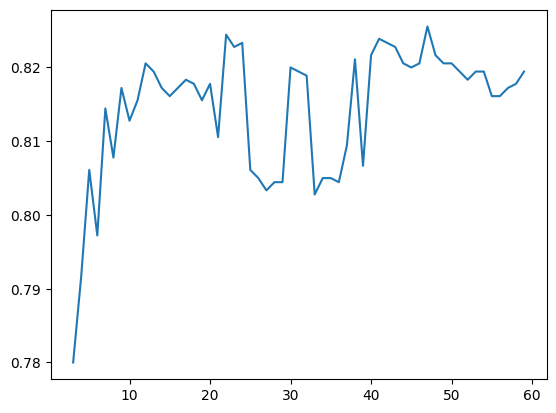

In [110]:
plt.plot(range(3,60),track_precision)

In [ ]:
# df = pd.DataFrame(weighted_selected_feat)

In [ ]:
def calculate_neighbour(train_data, test_data, K):
    
    numpy_distances = np.array(euclidean_distances(train_data,[test_data]).flatten())
    inv_distance = []
        
    indexes_by_shortest_dist = numpy_distances.argsort()   
    
    return indexes_by_shortest_dist

In [ ]:
def find_majority_and_predict(train_data, test_data, train_sentiments, K):
    
    nearest_neighbors_indexes = calculate_neighbour(train_data, test_data, K)
    sentiment_classes = []
    
    for i in nearest_neighbors_indexes:
        sentiment_classes.append(train_sentiments[i])
        
    return max(sentiment_classes, key=sentiment_classes.count)

In [ ]:
predicted_sentiments = []
print(len(weighted_test_feat))
for i in range(0,len(weighted_test_feat)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,weighted_test_feat[i], train_sentiments_array, 24))
    

In [ ]:
def find_accuracy(predicted_sentiment, real_sentiment):
    correct_prediction = 0
    for i in range(0,len(predicted_sentiments)):
        if predicted_sentiment[i] == real_sentiment[i]:
            correct_prediction += 1
    return np.divide(correct_prediction, len(predicted_sentiment))

In [ ]:
find_accuracy(predicted_sentiments,test_sentiments_array)

In [290]:
result_test_df = pd.read_csv('1661892619_9579706_test_file.csv', names=['reviews'])
basic_cleaning(result_test_df)
tokenize_data(result_test_df)
result_test_df['stop_words_cleaned'] = result_test_df.words.apply(lambda word_list: remove_stopwords(word_list))
result_test_df['lemma_word'] = result_test_df.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
result_test_df['cleaned_review'] = result_test_df.lemma_word.apply(lambda review_list: " ".join(review_list))
unlabeled_test_feat_matrix = selected_tf_vectorizer.transform(result_test_df['cleaned_review']).toarray()

In [ ]:
unlabeled_test_feat_matrix.shape

In [ ]:
# def find_max_chi_val(a,b):
#     max_chi = []
#     x = np.array(a)
#     y = np.array(b)
#     for i in range(0, len(x)):
#         max_chi.append(max(x[i],y[i]))
#     return np.array(max_chi)

In [291]:
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,100.987511,93.001330,193.988842
1,94.951223,87.442397,182.393620
2,42.049707,38.724379,80.774086
3,40.112482,36.940352,77.052834
4,15.777274,14.529594,30.306868
...,...,...,...
105,52.167794,48.042319,100.210113
106,20.704853,19.067495,39.772348
107,23.487752,21.630320,45.118072
108,20.752573,19.111442,39.864015


In [292]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [293]:
unlabled_weighted_data = weight_unlabled_data(unlabeled_test_feat_matrix, chi_sqare_table['sum'])

In [294]:
unlabled_weighted_data.shape

(18000, 110)

In [295]:
predicted_sentiments = []
print(len(unlabled_weighted_data))
for i in range(0,len(unlabled_weighted_data)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,unlabled_weighted_data[i], train_sentiments_array, 24))
    

18000
0


NameError: name 'find_majority_and_predict' is not defined

In [296]:
predicted_values = classifer_saved.predict(unlabled_weighted_data)

In [297]:
predicted_values.shape

(18000,)

In [298]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], predicted_values))
outfile.close()

In [299]:
1/(10**2)

0.01